## Data Analysis and Machine Learning using custom Neural Network (w/o any sicfy libraries)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # for data visualisation
from matplotlib import pyplot as plt # for data visualisation

# crazy thing we do for displaying graphs between cells
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.
np.random.seed(0)

sample_submission.csv
test.csv
train.csv



### Load Data

In [2]:
# Loading the training data
train = pd.read_csv("../input/train.csv")

In [3]:
# Loading the testing data
test = pd.read_csv("../input/test.csv")

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


### Data Visualisation

Let's visualise some of the images using matplotlib

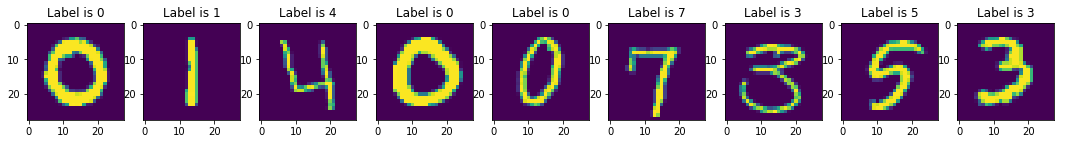

In [5]:
# Creating a figure to display images in rows and columns pattern (1x 10)
figure = plt.figure()

# Manually setting the figure width and height
figure.set_size_inches(20.5, 8.5)

# Setting up an image in each figure with a title of image label
for itr in range(1, 10):
    plt.subplot(1, 10, itr)
    label = train.loc[itr,'label']
    pixels = train.iloc[itr,1:].values.reshape((28,28))
    plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels)

# Displaying all image present in figure
plt.show()

### Normalizing Data


In [6]:
# We will divide the pixel value by fac and fit the values in range [0.01, 0.99] 
fac = 255
range_class = np.arange(10)

> **Since, we have our training dataset ready,we can now get out input as X and output as y value from our dataset to train our model.**

In [7]:
X = train.iloc[:,1:].values / fac
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
y = np.asfarray(train.iloc[:,0])
y = np.array([(range_class==label).astype(np.float) for label in y])
print(y)

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [9]:
test_X = test.values / fac
print(test_X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Backpropogating Neural Network

#### The neural network that we will create will have 3 layers:
* Input Layer
* Hidden Layer
* Output Layer


1. **Input Layer**: This layer will consist of 4 nodes as we have 4 features Sepal Length, Sepal Width, Petal Length, PetalWidth.

2. **Output Layer**: This layer will consist of 3 nodes as we have to classify between 3 outputs only. So if the value of output layer is 1,0,0 that means the prediction is Iris-setosa or if the output value is 0,1,0 then prediction will be Iris-versicolor.

> `w1`, `w2` will be a matrix that contains the weights of each connecting layer between Input nodes and Hidden nodes and Hidden nodes to Output nodes. The values of weights will range from `-1` to `1` with an overall mean of `0`.



In [10]:
hidden_layer_nodes = 20
input_layer_nodes = len(X[0])

w1 = 2 * np.random.random((input_layer_nodes, hidden_layer_nodes)) - 1
print(w1.shape)

(784, 20)


> `w2` will be the weights of connection between the hidden layer and next hidden layer. This will also has the same property same as `w1`.

In [11]:
w2 = 2 * np.random.random((hidden_layer_nodes, hidden_layer_nodes)) - 1
print(w2.shape)

(20, 20)


In [12]:
output_layer_nodes = len(y[0])
w3 = 2 * np.random.random((hidden_layer_nodes, output_layer_nodes)) - 1
print(w3.shape)

(20, 10)


## Train the network by updating weights using Back Propagation Algorithm

The two main important parts of traning our neural network is:
1. Forward Propagation
2. Back Propagation


#### Forward Propagation ( use current weights to caluculate output ):
* In Forward Propogation, we calculate the values of nodes present in the hidden layer using the weight matix (w1) and input nodes and then calculating the value of output nodes using the hidden layer nodes and weight matrix (w2).

#### Backpropagation ( update network weights ):
* As per my views, I think this is the core of neural network since under this section we update the weight matrix based on the error using gradient discent. After we calculate the output using feed forward network, we will calculate the error in this layer by subtracting the actual output and predicted output and then we will adjust our weight matrix to minimize the error.


### Activation Fucntion

In this netwok, we will be using the Sigmoid Activation function. But there are many other activation that you can use. The purpose of activation function is to squash the any value in the range between 0 and 1. We do this to bring non-leniarity in our model so that it can learn more complex function instead of just linear function.

For your learning about activation function, here are the links to [video](https://www.youtube.com/watch?v=NkOv_k7r6no) or [reading](https://towardsdatascience.com/activation-functions-and-its-types-which-is-better-a9a5310cc8f).


In [13]:
# Sigmoid Function Defination
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

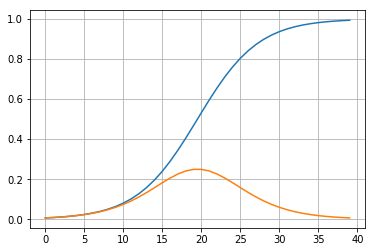

In [14]:
_x = np.linspace(-5, 5, 40)
plt.plot(sigmoid(_x))
plt.plot(sigmoid_derivative(sigmoid(_x)))
plt.grid()

In [15]:
learning_rate = 0.0003
error_per_iter = []

for i in range(10000):
    
    l1 = sigmoid(np.dot(X, w1))
    l2 = sigmoid(np.dot(l1, w2))
    l3 = sigmoid(np.dot(l2, w3))
    
    error = (abs(y - l3)).mean()
    
    error_per_iter.append(error)
    
    l3_delta = (y - l3) * sigmoid_derivative(l3)
    l2_delta = np.dot(l3_delta, w3.T) * sigmoid_derivative(l2)
    l1_delta = np.dot(l2_delta, w2.T) * sigmoid_derivative(l1)
    
    w3 += (np.dot(l2.T, l3_delta) * learning_rate)
    w2 += (np.dot(l1.T, l2_delta) * learning_rate)
    w1 += (np.dot(X.T, l1_delta) * learning_rate)
    
print("Error : %s" % (error))
# Error : 0.04159586023035698 / ephos = 1000 / learning rate = 0.001
# Error : 0.025026491999248827 / ephos = 1000 / learning rate = 0.003
# Error : 0.017449263358228224 / ephos = 2000 / learning rate = 0.003

Error : 0.0062121833410025435


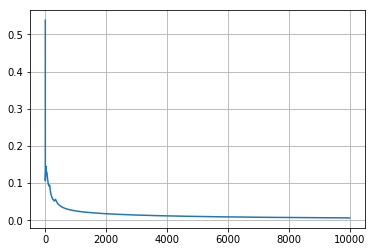

In [16]:
plt.plot(error_per_iter)
plt.grid()
plt.show()

In [17]:
X = test_X

l1 = sigmoid(np.dot(X, w1))
l2 = sigmoid(np.dot(l1, w2))
l3 = sigmoid(np.dot(l2, w3))

output = np.vstack((np.arange(1,28001), l3.argmax(axis=1))).T
data_to_submit = pd.DataFrame(output, columns = ['ImageId','Label']) 

data_to_submit.sample(n=10)

,ImageId,Label
13335,13336,7
13757,13758,9
10702,10703,2
25585,25586,8
24505,24506,5
16693,16694,5
14650,14651,7
7460,7461,3
19358,19359,5
18370,18371,3


In [18]:
data_to_submit.to_csv('csv_to_submit.csv', index = False)